# improt Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

# import Datasets

In [2]:
data = pd.read_csv(r"E:\ami\scraping\Telco-Customer-Churn.csv")

data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data preprocessing

In [4]:
print('Dataset shape:', data.shape)

Dataset shape: (7043, 21)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
null_Data = data.isna().sum()
print("Null Data Per Column:\n", null_Data)

Null Data Per Column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
duplicate = data.duplicated().sum()
print("Duplicate Values:", duplicate)

Duplicate Values: 0


In [8]:
# Convert TotalCharges to numeric (errors='coerce' will turn invalid ones into NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:

# Drop rows with missing TotalCharges
data.dropna(subset=['TotalCharges'], inplace=True)

In [10]:
# Drop 'customerID' since it's not useful for prediction
data.drop('customerID', axis=1, inplace=True)

In [11]:
# Convert target variable 'Churn' to 0 (No) and 1 (Yes)
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

In [12]:
# Check data types to identify categorical columns
print(data.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [13]:
print(data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [14]:
data['gender'].value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [15]:
data['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [16]:
data['tenure'].value_counts().head()

tenure
1     613
72    362
2     238
3     200
4     176
Name: count, dtype: int64

In [17]:

# List of Yes/No columns
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Map Yes -> 1, No -> 0 for each of these columns
for col in yes_no_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [18]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


# visualization

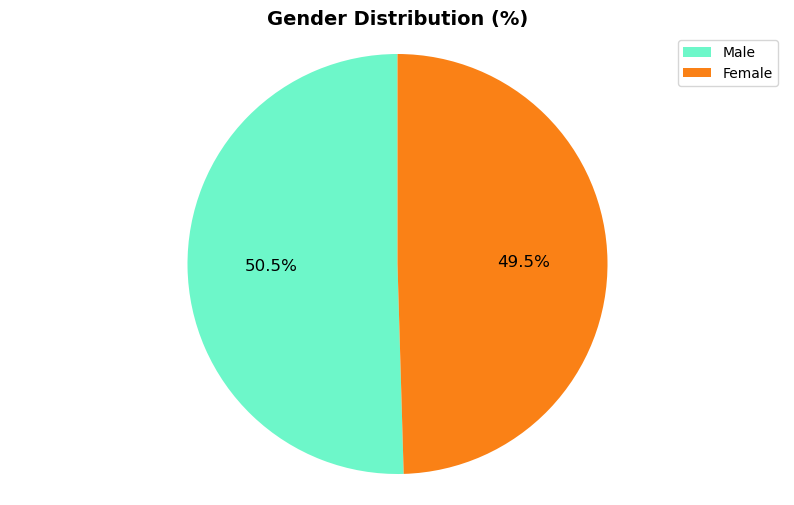

In [19]:
# Count gender values
gender_counts = data['gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, autopct='%1.1f%%', startangle=90, colors=['#6df7c9','#fa8116'], textprops={'fontsize': 12})
plt.title('Gender Distribution (%)', fontsize=14, fontweight='bold')
plt.axis('equal')  # Keep circle shape
plt.legend(labels=['Male', 'Female'])
plt.show()

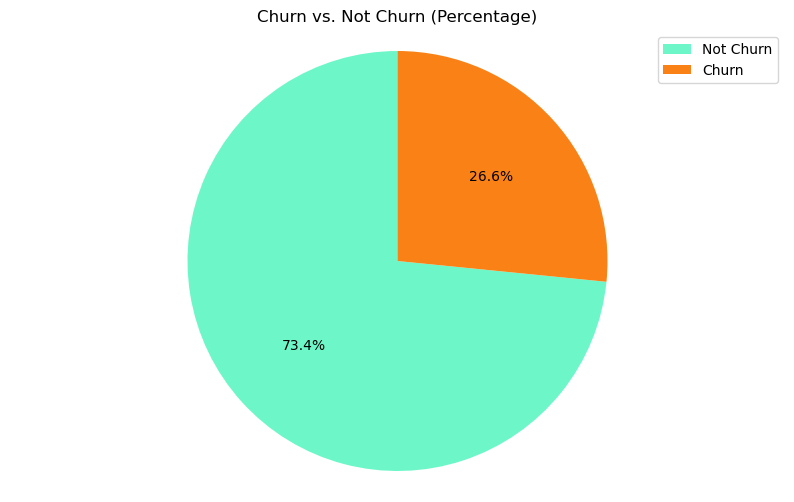

In [20]:
# Count values
churn_counts = data['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values
percentages = churn_counts.values / churn_counts.values.sum() * 100

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, autopct='%1.1f%%', startangle=90, colors=['#6df7c9','#fa8116'])
plt.title('Churn vs. Not Churn (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.legend(labels=['Not Churn', 'Churn'])
plt.show()

In [21]:
# Set renderer
pio.renderers.default = 'iframe_connected'

# No need to map gender if it's already string
data['churn_str'] = data['Churn'].map({0: 'Not Churned', 1: 'Churned'})

# Plot sunburst
fig = px.sunburst(
    data,
    path=['gender', 'churn_str'],  # use 'gender' directly
    color='gender',
    color_discrete_map={
        'Male': "#57b6fa",
        'Female': '#e377c2'
    },
    title='Customer Churn Breakdown by Gender'
)

fig.update_traces(textinfo='label+percent entry')
fig.show()

In [22]:
print(data['Churn'].unique())
print(data['Churn'].dtype)


[0 1]
int64


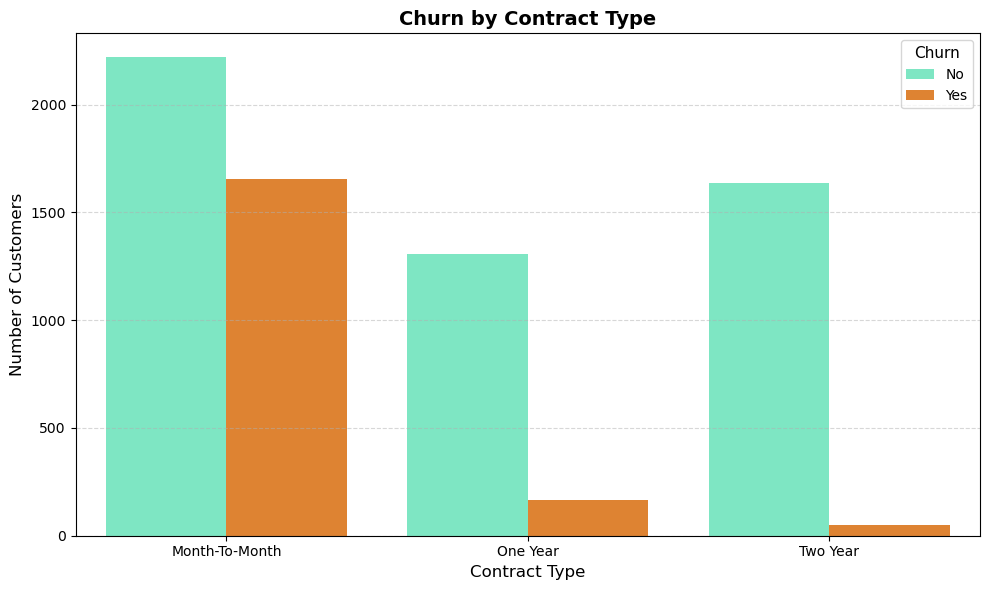

In [23]:
# Convert numeric churn values to string labels
data['Churn'] = data['Churn'].map({0: 'No', 1: 'Yes'})

# Clean up strings in case of leading/trailing whitespace or inconsistent casing
data['Churn'] = data['Churn'].str.strip().str.title()
data['Contract'] = data['Contract'].astype(str).str.strip().str.title()  # Ensure it's string first

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Contract', hue='Churn', palette=['#6df7c9', '#fa8116'])

plt.title('Churn by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
# Force compatible renderer
pio.renderers.default = 'iframe_connected'

# Clean up strings
data['Churn'] = data['Churn'].str.strip().str.title()
data['PaymentMethod'] = data['PaymentMethod'].str.strip().str.title()

# Create sunburst chart
fig = px.sunburst(
    data,
    path=['Churn', 'PaymentMethod'],  # hierarchy: Churn → Payment Method
    values=None,                      # auto-counts rows
    color='Churn',                    # color by churn status
    color_discrete_map={
        'Yes': '#fa8116',    # Churned
        'No': '#6df7c9'      # Not churned
    },
    title='Churn Breakdown by Payment Method'
)

# Show label + percentage per entry
fig.update_traces(textinfo='label+percent entry')
fig.show()


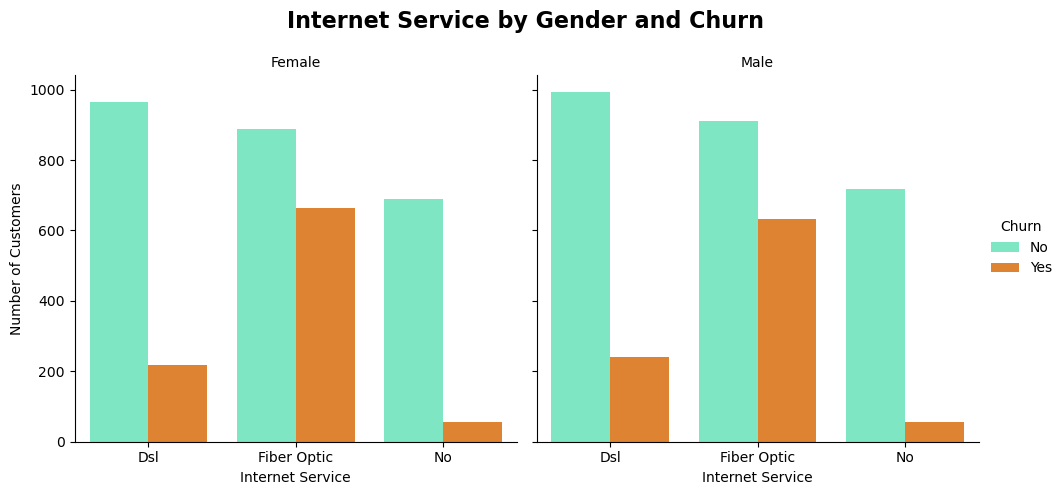

In [25]:
data['gender'] = data['gender'].str.strip().str.title()
data['Churn'] = data['Churn'].str.strip().str.title()
data['InternetService'] = data['InternetService'].str.strip().str.title()

# Plot grouped bar chart
g = sns.catplot(
    data=data,
    x='InternetService',
    hue='Churn',
    col='gender',
    kind='count',
    palette=['#6df7c9', '#fa8116'],  # Not churned, Churned
    height=5,
    aspect=1
)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Internet Service by Gender and Churn', fontsize=16, fontweight='bold')
g.set_axis_labels("Internet Service", "Number of Customers")
g.set_titles("{col_name}")

plt.show()

In [26]:
# Convert to string before applying string methods
data['Dependents'] = data['Dependents'].astype(str).str.strip().str.title()
data['gender'] = data['gender'].astype(str).str.strip().str.title()
data['Churn'] = data['Churn'].astype(str).str.strip().str.title()
data['Partner'] = data['Partner'].astype(str).str.strip().str.title()

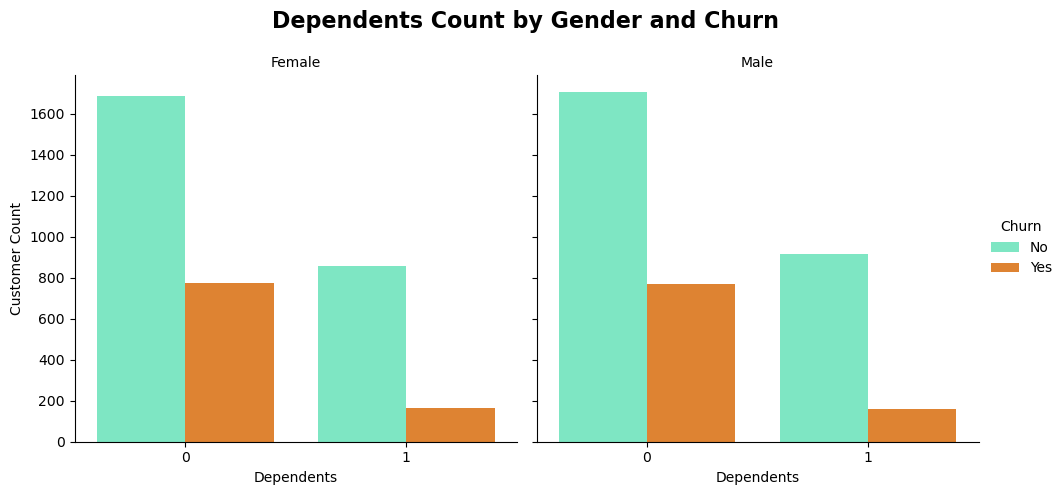

In [27]:
# Create grouped bar chart
g = sns.catplot(
    data=data,
    x='Dependents',
    hue='Churn',
    col='gender',
    kind='count',
    palette={'No': '#6df7c9', 'Yes': '#fa8116'},
    height=5,
    aspect=1
)

# Add custom titles and formatting
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Dependents Count by Gender and Churn', fontsize=16, fontweight='bold')
g.set_axis_labels("Dependents", "Customer Count")
g.set_titles("{col_name}")  # sets the column header to the gender

plt.show()

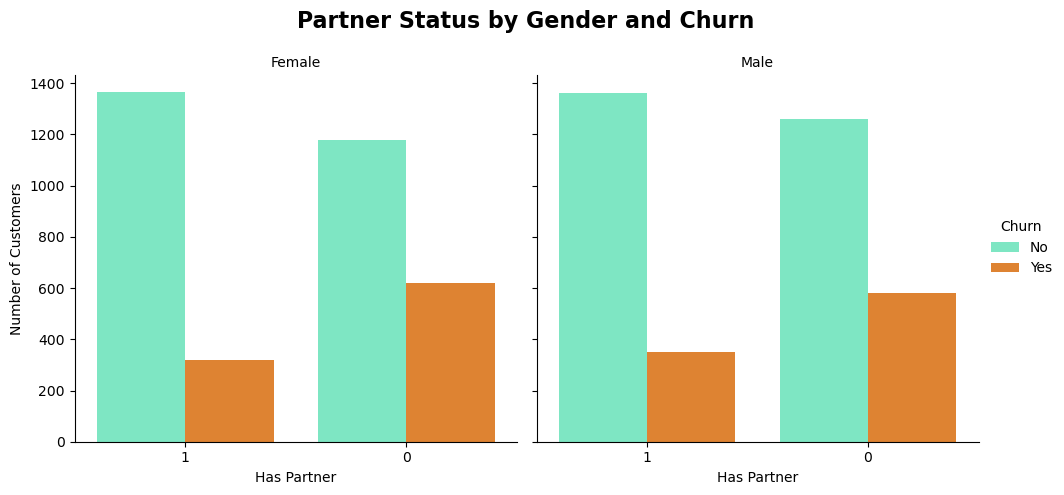

In [28]:

# Plot grouped bar chart
g = sns.catplot(
    data=data,
    x='Partner',
    hue='Churn',
    col='gender',
    kind='count',
    palette={'No': '#6df7c9', 'Yes': '#fa8116'},  # Not Churned, Churned
    height=5,
    aspect=1
)

# Customize titles and labels
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Partner Status by Gender and Churn', fontsize=16, fontweight='bold')
g.set_axis_labels("Has Partner", "Number of Customers")
g.set_titles("{col_name}")  # Gender titles

plt.show()

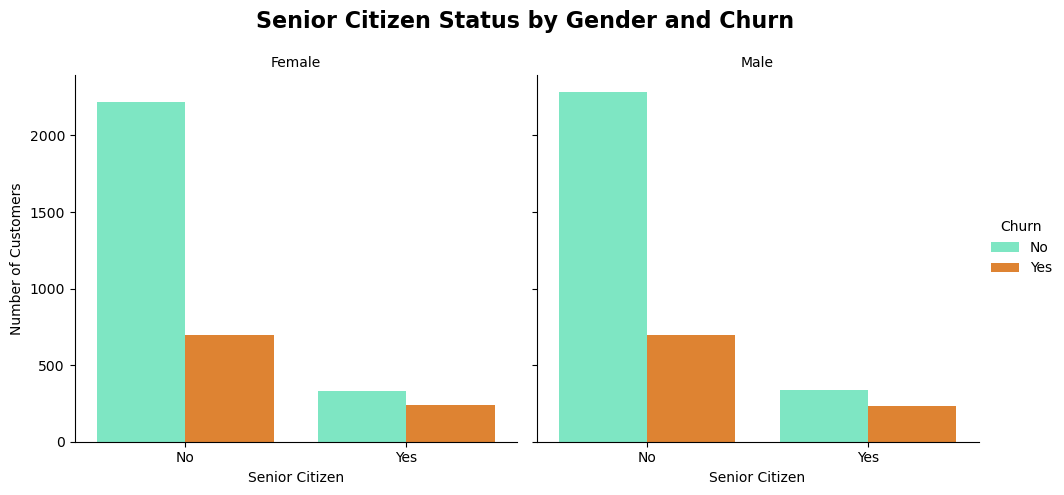

In [29]:
# Map SeniorCitizen from 0/1 to 'No'/'Yes' for clarity
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Clean other values
data['gender'] = data['gender'].str.strip().str.title()
data['Churn'] = data['Churn'].str.strip().str.title()

# Plot
g = sns.catplot(
    data=data,
    x='SeniorCitizen',
    hue='Churn',
    col='gender',
    kind='count',
    palette={'No': '#6df7c9', 'Yes': '#fa8116'},  # Not Churned, Churned
    height=5,
    aspect=1
)

# Customize labels and titles
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Senior Citizen Status by Gender and Churn', fontsize=16, fontweight='bold')
g.set_axis_labels("Senior Citizen", "Number of Customers")
g.set_titles("{col_name}")  # Shows 'Male' / 'Female'

plt.show()

In [30]:
# Function to categorize tenure
def bucket_tenure(tenure):
    if tenure <= 12:
        return '0-1 year'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    else:
        return '4+ years'

# Apply the function
data['TenureBucket'] = data['tenure'].apply(bucket_tenure)

In [31]:
data['TenureBucket'].value_counts()

TenureBucket
4+ years     2239
0-1 year     2175
2-4 years    1594
1-2 years    1024
Name: count, dtype: int64

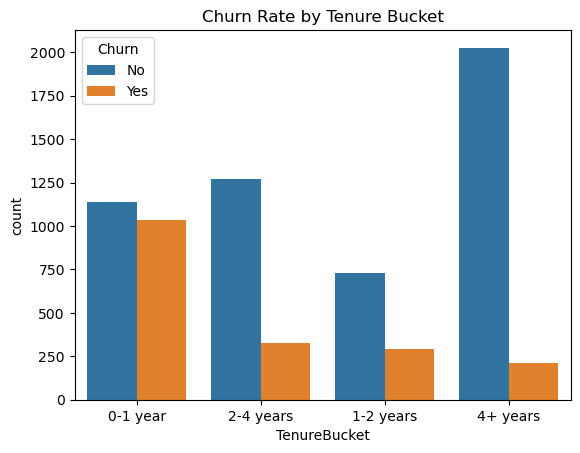

In [32]:
sns.countplot(data=data, x='TenureBucket', hue='Churn')
plt.title('Churn Rate by Tenure Bucket')
plt.show()


In [33]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'churn_str', 'TenureBucket'],
      dtype='object')

# Data Featuring

In [34]:
# Label Encoding
columns_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'TenureBucket'] 

le = LabelEncoder()
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

In [35]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_str,TenureBucket
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,Not Churned,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,Not Churned,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,Churned,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,Not Churned,2
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,Churned,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int32  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int32  
 17  

In [37]:
data['TotalCharges'].value_counts().head()

TotalCharges
20.20    11
19.75     9
20.05     8
19.90     8
19.65     8
Name: count, dtype: int64

In [38]:
# the column is of string type before using .str
data['TotalCharges'] = data['TotalCharges'].astype(str)

# Now remove commas
data['TotalCharges'] = data['TotalCharges'].str.replace(',', '')

# Convert to float (with errors coerced to NaN)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int32  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int32  
 17  

In [40]:
# Correlation
data[['TotalCharges', 'MonthlyCharges', 'TenureBucket']].corr()

,TotalCharges,MonthlyCharges,TenureBucket
TotalCharges,1.000000,0.651065,0.782740
MonthlyCharges,0.651065,1.000000,0.237278
TenureBucket,0.782740,0.237278,1.000000


In [41]:
X = data.drop(['Churn','churn_str', 'tenure'], axis=1)
y = data['Churn']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
y_test.value_counts()

Churn
0    1033
1     374
Name: count, dtype: int64

# Model 1 Implementation

                 Model  Accuracy
0  Logistic Regression  0.791045
2        Random Forest  0.780384
1        Decision Tree  0.718550


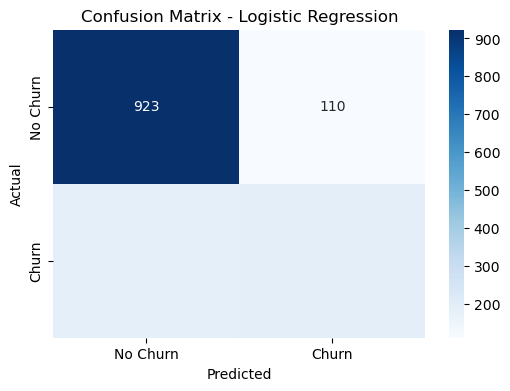

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC Score: 0.8270


In [44]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Define models dictionary
Model = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate all models
results = []
for name, model in Model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

# Create DataFrame of results and sort by accuracy
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(results_df)

# Train Logistic Regression (best model)
lgr = LogisticRegression(max_iter=1000, random_state=42)
lgr.fit(X_train, y_train)

# Predict probabilities for ROC AUC calculation
lgr_probs = lgr.predict_proba(X_test)[:, 1]

# Predict classes
lgr_preds = lgr.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, lgr_preds)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, lgr_preds))

# Calculate and print ROC AUC score
lgr_auc = roc_auc_score(y_test, lgr_probs)
print(f'ROC AUC Score: {lgr_auc:.4f}')


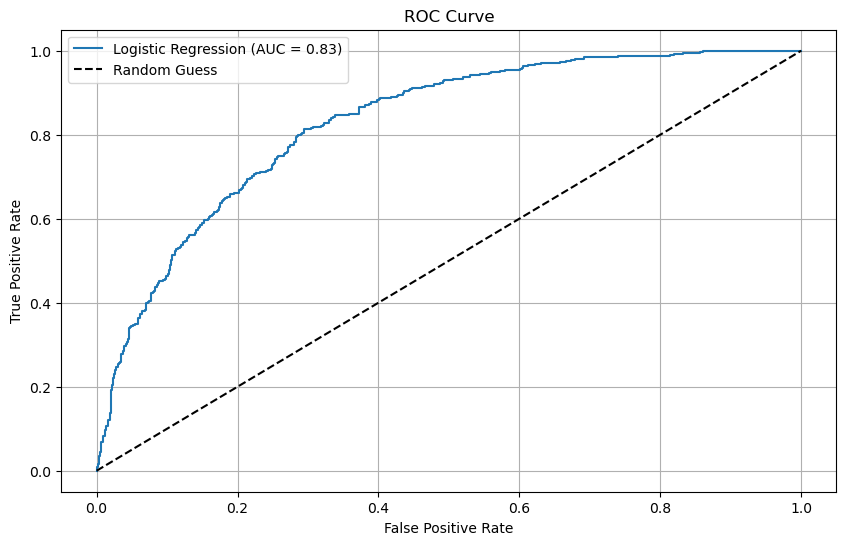

In [45]:
# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lgr_probs)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lgr_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

In [46]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_str,TenureBucket
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,Not Churned,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,Not Churned,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,1,Churned,0
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,Not Churned,2
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,1,Churned,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,...,2,2,1,1,3,84.80,1990.50,0,Not Churned,1
7039,0,0,1,1,72,1,2,1,0,2,...,2,2,1,1,1,103.20,7362.90,0,Not Churned,3
7040,0,0,1,1,11,0,1,0,2,0,...,0,0,0,1,2,29.60,346.45,0,Not Churned,0
7041,1,1,1,0,4,1,2,1,0,0,...,0,0,0,1,3,74.40,306.60,1,Churned,0


# Model 2 Implementation

In [47]:
import pandas as pd

# Load your dataset
data = pd.read_csv(r"E:\ami\scraping\Telco-Customer-Churn.csv")

# Drop customerID
data = data.drop("customerID", axis=1)

# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop missing values (can also fillna)
data = data.dropna()

In [48]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

X = data.drop("Churn", axis=1)
y = data["Churn"]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)

In [50]:
import torch.nn as nn

class TabularTransformer(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super(TabularTransformer, self).__init__()

        self.embedding = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=256, dropout=dropout, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = nn.Sequential(
            nn.Linear(d_model, 32),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(32, 2)  # Binary classification
        )

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)  # (batch, seq=1, d_model)
        x = self.transformer(x)
        return self.classifier(x.squeeze(1))

In [51]:
Model = TabularTransformer(input_dim=X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(Model.parameters(), lr=1e-3)

# Training loop
for epoch in range(20):
    Model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = Model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}")

Epoch 1: Loss = 40.0725
Epoch 2: Loss = 37.6843
Epoch 3: Loss = 37.2167
Epoch 4: Loss = 36.9298
Epoch 5: Loss = 36.9012
Epoch 6: Loss = 36.4921
Epoch 7: Loss = 36.3711
Epoch 8: Loss = 36.1432
Epoch 9: Loss = 36.4077
Epoch 10: Loss = 36.0013
Epoch 11: Loss = 35.8662
Epoch 12: Loss = 35.6643
Epoch 13: Loss = 35.7031
Epoch 14: Loss = 35.4151
Epoch 15: Loss = 35.2180
Epoch 16: Loss = 35.0565
Epoch 17: Loss = 34.7519
Epoch 18: Loss = 34.4620
Epoch 19: Loss = 34.2592
Epoch 20: Loss = 33.9839


In [52]:
from sklearn.metrics import classification_report, confusion_matrix

Model.eval()
with torch.no_grad():
    y_pred_logits = Model(X_test_tensor)
    y_pred = torch.argmax(y_pred_logits, dim=1)

print("Classification Report:")
print(classification_report(y_test_tensor, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test_tensor, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Confusion Matrix:

[[923 110]
 [192 182]]


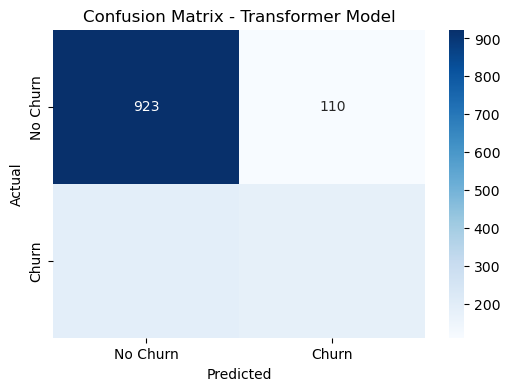

In [53]:
# Confusion Matrix plot
cm = confusion_matrix(y_test_tensor, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Transformer Model')
plt.show()



In [54]:
# ROC AUC Score
y_test_np = y_test_tensor.numpy()
y_probs_np = y_pred.numpy()
transformer_auc = roc_auc_score(y_test_np, y_probs_np)
print(f'ROC AUC Score: {transformer_auc:.4f}')

ROC AUC Score: 0.6901


# Visualization of Attentation

In [55]:
import plotly.graph_objects as go
import numpy as np

# Simulate example data
labels = list(X.columns) + ["Churned", "Not Churned"]
source = list(range(len(X.columns))) * 2  # Features
target = [len(X.columns)] * len(X.columns) + [len(X.columns) + 1] * len(X.columns)
values = np.random.rand(len(source))

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20, color="lightblue"),
    link=dict(source=source, target=target, value=values)
)])

fig.update_layout(title_text="Feature Contribution Toward Churn Prediction", font_size=12)
fig.show()

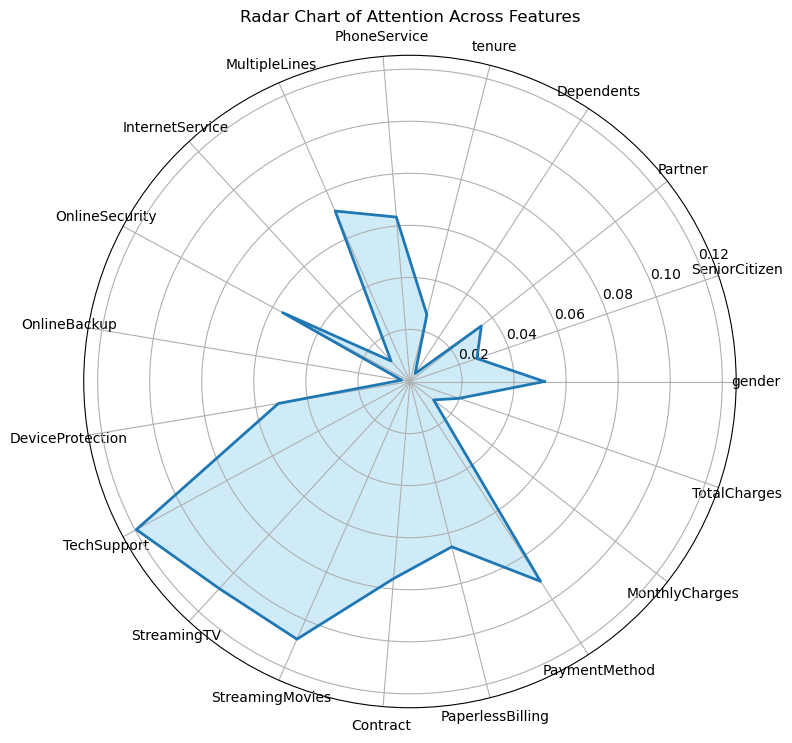

In [56]:
from math import pi

# Normalize and simulate attention (for one sample)
sample_attn = np.random.rand(len(X.columns))
sample_attn /= sample_attn.sum()

categories = list(X.columns)
N = len(categories)

# Radar chart setup
values = sample_attn.tolist()
values += values[:1]  # close the loop

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, size=10)

ax.plot(angles, values, linewidth=2, linestyle='solid', label="Attention Score")
ax.fill(angles, values, 'skyblue', alpha=0.4)

plt.title("Radar Chart of Attention Across Features")
plt.tight_layout()
plt.show()

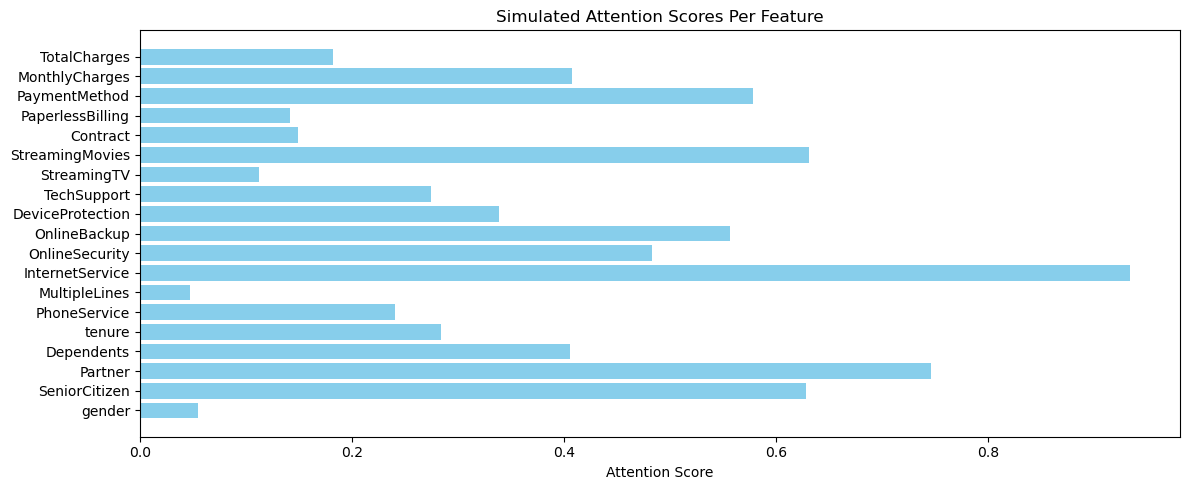

In [57]:

# Simulate attention weights across features (e.g., for 1 attention head)
attention_scores = torch.rand(X.shape[1]).numpy()
feature_names = X.columns

plt.figure(figsize=(12, 5))
plt.barh(feature_names, attention_scores, color='skyblue')
plt.title("Simulated Attention Scores Per Feature")
plt.xlabel("Attention Score")
plt.tight_layout()
plt.show()

# Comparing the Both Model

In [58]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


# # Comparison
# comparison = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Transformer'],
#     'Accuracy': [lgr_accuracy, transformer_accuracy],
#     'ROC AUC': [lgr_auc, transformer_auc]
# })

# print(comparison)


import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# 1. Logistic Regression
lgr = LogisticRegression(max_iter=1000, random_state=42)
lgr.fit(X_train, y_train)

lgr_preds = lgr.predict(X_test)
lgr_probs = lgr.predict_proba(X_test)[:, 1]

lgr_accuracy = accuracy_score(y_test, lgr_preds)
lgr_auc = roc_auc_score(y_test, lgr_probs)

# 2. Transformer
Model.eval()
with torch.no_grad():
    y_pred_logits = Model(X_test_tensor)
    y_pred = torch.argmax(y_pred_logits, dim=1)

# Convert tensor labels and predictions to numpy
y_test_tensor_np = y_test_tensor.numpy()
y_pred_np = y_pred.numpy()

transformer_accuracy = accuracy_score(y_test_tensor_np, y_pred_np)
transformer_auc = roc_auc_score(y_test_tensor_np, y_pred_logits[:, 1].numpy())

# Comparison
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Transformer'],
    'Accuracy': [lgr_accuracy, transformer_accuracy],
    'ROC AUC': [lgr_auc, transformer_auc]
})

print(comparison)


                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.793888  0.834492
1          Transformer  0.785359  0.817735


In [59]:

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from tabulate import tabulate


# Generate classification reports
report_lgr = classification_report(y_test_np, lgr_preds, output_dict=True)
report_transformer = classification_report(y_test_tensor_np, y_pred_np, output_dict=True)

# Accuracy and ROC AUC
accuracy_lgr = accuracy_score(y_test_np, lgr_preds)
roc_auc_lgr = roc_auc_score(y_test_np, lgr_probs)

accuracy_transformer = accuracy_score(y_test_tensor_np, y_pred_np)
roc_auc_transformer = roc_auc_score(y_test_tensor_np, y_probs_np)

# Construct comparison table
data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'Support'],
    'Class 0 - Logistic Regression': [
        round(report_lgr['0']['precision'], 4),
        round(report_lgr['0']['recall'], 4),
        round(report_lgr['0']['f1-score'], 4),
        int(report_lgr['0']['support'])
    ],
    'Class 1 - Logistic Regression': [
        round(report_lgr['1']['precision'], 4),
        round(report_lgr['1']['recall'], 4),
        round(report_lgr['1']['f1-score'], 4),
        int(report_lgr['1']['support'])
    ],
    'Class 0 - Transformer': [
        round(report_transformer['0']['precision'], 4),
        round(report_transformer['0']['recall'], 4),
        round(report_transformer['0']['f1-score'], 4),
        int(report_transformer['0']['support'])
    ],
    'Class 1 - Transformer': [
        round(report_transformer['1']['precision'], 4),
        round(report_transformer['1']['recall'], 4),
        round(report_transformer['1']['f1-score'], 4),
        int(report_transformer['1']['support'])
    ],
}

# Create the base DataFrame
comparison_df = pd.DataFrame(data)

# Add Accuracy and ROC AUC as extra rows
overall_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC'],
    'Class 0 - Logistic Regression': [round(accuracy_lgr, 4), round(roc_auc_lgr, 4)],
    'Class 1 - Logistic Regression': ['', ''],
    'Class 0 - Transformer': [round(accuracy_transformer, 4), round(roc_auc_transformer, 4)],
    'Class 1 - Transformer': ['', '']
})

# Combine the two tables
final_df = pd.concat([comparison_df, overall_metrics], ignore_index=True)

# Print as formatted table
print(tabulate(final_df, headers='keys', tablefmt='psql', showindex=False))


+-----------+---------------------------------+---------------------------------+-------------------------+-------------------------+
| Metric    |   Class 0 - Logistic Regression | Class 1 - Logistic Regression   |   Class 0 - Transformer | Class 1 - Transformer   |
|-----------+---------------------------------+---------------------------------+-------------------------+-------------------------|
| Precision |                          0.8475 | 0.6243                          |                  0.8278 | 0.6233                  |
| Recall    |                          0.8771 | 0.5642                          |                  0.8935 | 0.4866                  |
| F1-score  |                          0.862  | 0.5927                          |                  0.8594 | 0.5465                  |
| Support   |                       1033      | 374.0                           |               1033      | 374.0                   |
| Accuracy  |                          0.7939 |               

# visualization of comparing Models

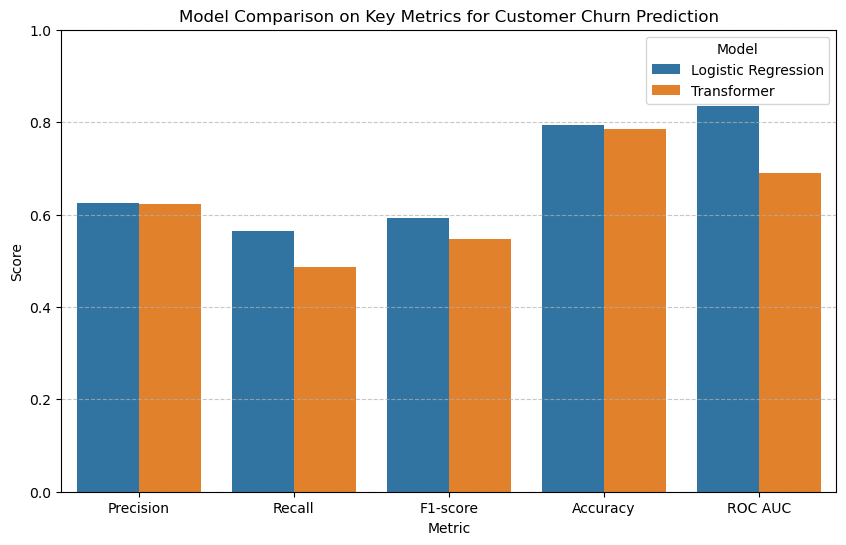

In [60]:

# Metrics to visualize (focus on Class 1 + overall metrics)
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy', 'ROC AUC']

# Extract values for Class 1 from reports and overall metrics
logistic_values = [
    round(report_lgr['1']['precision'], 4),
    round(report_lgr['1']['recall'], 4),
    round(report_lgr['1']['f1-score'], 4),
    round(accuracy_lgr, 4),
    round(roc_auc_lgr, 4)
]

transformer_values = [
    round(report_transformer['1']['precision'], 4),
    round(report_transformer['1']['recall'], 4),
    round(report_transformer['1']['f1-score'], 4),
    round(accuracy_transformer, 4),
    round(roc_auc_transformer, 4)
]

# Create DataFrame suitable for seaborn barplot
plot_df = pd.DataFrame({
    'Metric': metrics * 2,
    'Score': logistic_values + transformer_values,
    'Model': ['Logistic Regression'] * len(metrics) + ['Transformer'] * len(metrics)
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=plot_df)
plt.title('Model Comparison on Key Metrics for Customer Churn Prediction')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Analysis and Interpretation

# Conclusion & Recommendation

# Recommendation:

In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import torch.nn.functional as F

# Convert PyTorch tensor labels to numpy
y_test_tensor_np = y_test_tensor.numpy()
y_test_np = y_test.values  # for Logistic Regression

# Logistic Regression predictions & probabilities
lgr_preds = lgr.predict(X_test)
lgr_probs = lgr.predict_proba(X_test)[:, 1]

# Transformer model outputs
Model.eval()
with torch.no_grad():
    y_pred_logits = Model(X_test_tensor)
    y_pred = torch.argmax(y_pred_logits, dim=1)
    y_probs = F.softmax(y_pred_logits, dim=1)[:, 1]

y_pred_np = y_pred.numpy()
y_probs_np = y_probs.numpy()

# Calculate metrics
lgr_accuracy = accuracy_score(y_test_np, lgr_preds)
lgr_auc = roc_auc_score(y_test_np, lgr_probs)
transformer_accuracy = accuracy_score(y_test_tensor_np, y_pred_np)
transformer_auc = roc_auc_score(y_test_tensor_np, y_probs_np)

# Classification reports
report_lgr = classification_report(y_test_np, lgr_preds, output_dict=True)
report_transformer = classification_report(y_test_tensor_np, y_pred_np, output_dict=True)

# Prepare table data
data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'Support'],
    'Class 0 - Logistic Regression': [
        round(report_lgr['0']['precision'], 4),
        round(report_lgr['0']['recall'], 4),
        round(report_lgr['0']['f1-score'], 4),
        int(report_lgr['0']['support'])
    ],
    'Class 1 - Logistic Regression': [
        round(report_lgr['1']['precision'], 4),
        round(report_lgr['1']['recall'], 4),
        round(report_lgr['1']['f1-score'], 4),
        int(report_lgr['1']['support'])
    ],
    'Class 0 - Transformer': [
        round(report_transformer['0']['precision'], 4),
        round(report_transformer['0']['recall'], 4),
        round(report_transformer['0']['f1-score'], 4),
        int(report_transformer['0']['support'])
    ],
    'Class 1 - Transformer': [
        round(report_transformer['1']['precision'], 4),
        round(report_transformer['1']['recall'], 4),
        round(report_transformer['1']['f1-score'], 4),
        int(report_transformer['1']['support'])
    ],
}

comparison_df = pd.DataFrame(data)

overall_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC'],
    'Class 0 - Logistic Regression': [round(lgr_accuracy, 4), round(lgr_auc, 4)],
    'Class 1 - Logistic Regression': ['', ''],
    'Class 0 - Transformer': [round(transformer_accuracy, 4), round(transformer_auc, 4)],
    'Class 1 - Transformer': ['', '']
})

final_df = pd.concat([comparison_df, overall_metrics], ignore_index=True)

from tabulate import tabulate
print(tabulate(final_df, headers='keys', tablefmt='psql', showindex=False))


+-----------+---------------------------------+---------------------------------+-------------------------+-------------------------+
| Metric    |   Class 0 - Logistic Regression | Class 1 - Logistic Regression   |   Class 0 - Transformer | Class 1 - Transformer   |
|-----------+---------------------------------+---------------------------------+-------------------------+-------------------------|
| Precision |                          0.8475 | 0.6243                          |                  0.8278 | 0.6233                  |
| Recall    |                          0.8771 | 0.5642                          |                  0.8935 | 0.4866                  |
| F1-score  |                          0.862  | 0.5927                          |                  0.8594 | 0.5465                  |
| Support   |                       1033      | 374.0                           |               1033      | 374.0                   |
| Accuracy  |                          0.7939 |               